# Chokepoint Complete MatchScore Visualization

This notebook is created to visualize the complete match score distribution of the Chokepoint Dataset. 
http://arma.sourceforge.net/chokepoint/

This dataset contains 29 subjects and 65,908 images, which are cropped and in grayscale. Equal number of genuine and imposter scores are generated from OpenFace and plotted below. The value "3" is hardcoded for all those images that OpenFace is unable to detect a face. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
dfG = pd.read_csv('./Data/Final_Genuine_Scores.csv')
dfI = pd.read_csv('./Data/Final_Imposter_Scores.csv')

GScores = dfG[['MatchScore']].values
IScores = dfI[['MatchScore']].values


In [4]:
dfG

,Name,MatchScore
0,S01_1.pgm,0.738
1,S01_2.pgm,0.983
2,S01_3.pgm,0.730
3,S01_4.pgm,0.728
4,S01_5.pgm,0.477
5,S01_6.pgm,0.912
6,S01_7.pgm,0.334
7,S01_8.pgm,0.626
8,S01_9.pgm,0.450
9,S01_10.pgm,0.258


In [5]:
dfI

,Face1,Face2,MatchScore
0,S01_1.pgm,S02_1.pgm,3.000
1,S01_1.pgm,S03_1.pgm,0.743
2,S01_1.pgm,S04_1.pgm,3.000
3,S01_1.pgm,S05_1.pgm,3.000
4,S01_1.pgm,S06_1.pgm,1.060
5,S01_1.pgm,S07_1.pgm,1.356
6,S01_1.pgm,S09_1.pgm,1.558
7,S01_1.pgm,S10_1.pgm,1.381
8,S01_1.pgm,S11_1.pgm,1.454
9,S01_1.pgm,S12_1.pgm,1.153


([<matplotlib.axis.XTick at 0x7f6e5c8fe450>,
 <a list of 30 Text xticklabel objects>)

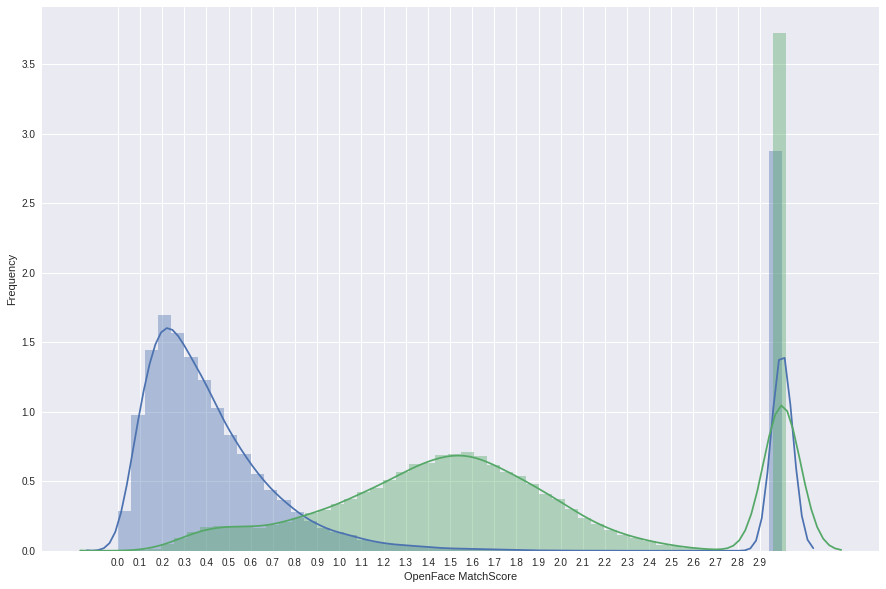

In [6]:
sns.set(color_codes=True)
dims = (15, 10)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=dims)
axs.set_xlabel('OpenFace MatchScore')
axs.set_ylabel('Frequency')

sns.distplot(GScores)
sns.distplot(IScores)

plt.xticks(np.arange(0,3,0.1))
#plt.yticks(np.arange(0,3,0.1))

In [7]:
def AccuracyCalculator(Th):
    
    dfG_th = dfG[dfG['MatchScore']>Th]
    FalseReject = (dfG_th.size*100)/(dfG.size)
    print('False Reject Rate: ',FalseReject, '%f')
   
    dfI_th = dfI[dfI['MatchScore']<Th]
    FalseAccept = (dfI_th.size*100)/(dfI.size)
    print('False Accept Rate: ',FalseAccept, '%f')

    

In [7]:

interact(AccuracyCalculator, Th=(dfG.MatchScore.min(), dfI.MatchScore.max()));

('False Reject Rate: ', 17, '%f')
('False Accept Rate: ', 42, '%f')


In [8]:
Th = 0.85
from __future__ import division
dfG_th = dfG[dfG['MatchScore']>Th]
FalseReject = (dfG_th.size*100)/(dfG.size)
print 'False Reject Rate: ', "%3f" % FalseReject

dfI_th = dfI[dfI['MatchScore']<Th]
FalseAccept = (dfI_th.size*100)/(dfI.size)
print 'False Accept Rate: ',"%3f" % FalseAccept 


    

False Reject Rate:  23.086361
False Accept Rate:  10.603448


In [9]:
Th = 0.84
from __future__ import division
dfG_th = dfG[dfG['MatchScore']>Th]
FalseReject = (dfG_th.size*100)/(dfG.size)
print 'False Reject Rate: ', "%3f" % FalseReject

dfI_th = dfI[dfI['MatchScore']<Th]
FalseAccept = (dfI_th.size*100)/(dfI.size)
print 'False Accept Rate: ',"%3f" % FalseAccept 



False Reject Rate:  23.300299
False Accept Rate:  10.350985


In [10]:
Th = 0.8
from __future__ import division
dfG_th = dfG[dfG['MatchScore']>Th]
FalseReject = (dfG_th.size*100)/(dfG.size)
print 'False Reject Rate: ', "%3f" % FalseReject

dfI_th = dfI[dfI['MatchScore']<Th]
FalseAccept = (dfI_th.size*100)/(dfI.size)
print 'False Accept Rate: ',"%3f" % FalseAccept 



False Reject Rate:  24.343244
False Accept Rate:  9.411946
